<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparation-for-Classification" data-toc-modified-id="Preparation-for-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparation for Classification</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#IV-and-DV" data-toc-modified-id="IV-and-DV-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>IV and DV</a></span></li><li><span><a href="#Binning-DV" data-toc-modified-id="Binning-DV-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Binning DV</a></span></li></ul></li><li><span><a href="#Using-Numerical-Features" data-toc-modified-id="Using-Numerical-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using Numerical Features</a></span><ul class="toc-item"><li><span><a href="#Specify-Numeric-Features-(IVs)" data-toc-modified-id="Specify-Numeric-Features-(IVs)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Specify Numeric Features (IVs)</a></span></li><li><span><a href="#Feature-(IV)-Transformations" data-toc-modified-id="Feature-(IV)-Transformations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature (IV) Transformations</a></span></li><li><span><a href="#Splitting-Training-and-Testing-Sets" data-toc-modified-id="Splitting-Training-and-Testing-Sets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Splitting Training and Testing Sets</a></span></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Random Forests</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Cross Validation</a></span></li></ul></li><li><span><a href="#Adding-Categorical-Features" data-toc-modified-id="Adding-Categorical-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Adding Categorical Features</a></span><ul class="toc-item"><li><span><a href="#Dummy-Coding-Movie-Genres" data-toc-modified-id="Dummy-Coding-Movie-Genres-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummy Coding Movie Genres</a></span></li><li><span><a href="#Running-Random-Forests" data-toc-modified-id="Running-Random-Forests-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Running Random Forests</a></span></li></ul></li><li><span><a href="#More-Features-=-Better-Performance-?" data-toc-modified-id="More-Features-=-Better-Performance-?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>More Features = Better Performance ?</a></span><ul class="toc-item"><li><span><a href="#Dummy-Coding-Director/Actor-Names" data-toc-modified-id="Dummy-Coding-Director/Actor-Names-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dummy Coding Director/Actor Names</a></span></li><li><span><a href="#Running-Random-Forests" data-toc-modified-id="Running-Random-Forests-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Running Random Forests</a></span></li></ul></li></ul></div>

# Preparation for Classification

## Loading Data

The dataset is from Kaggle, collected originally from IMDB.

Here’s the link for the dataset: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

Code Reference: https://www.kaggle.com/carolzhangdc/analyze-imdb-score-with-data-mining-algorithms


In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('./movie_metadata.csv')

## Data Description

It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the **dependent variable** while the other 27 variables are possible predictors (**independent variables**).

    Variable Name: Description
    movie_title: Title of the Movie
    duration: Duration in minutes
    director_name: Name of the Director of the Movie
    director_facebook_likes: Number of likes of the Director on his Facebook Page
    actor_1_name: Primary actor starring in the movie
    actor_1_facebook_likes: Number of likes of the Actor_1 on his/her Facebook Page
    actor_2_name: Other actor starring in the movie
    actor_2_facebook_likes: Number of likes of the Actor_2 on his/her Facebook Page
    actor_3_name: Other actor starring in the movie
    actor_3_facebook_likes: Number of likes of the Actor_3 on his/her Facebook Page
    num_user_for_reviews: Number of users who gave a review
    num_critic_for_reviews: Number of critical reviews on imdb
    num_voted_users: Number of people who voted for the movie
    cast_total_facebook_likes: Total number of facebook likes of the entire cast of the movie
    movie_facebook_likes: Number of Facebook likes in the movie page
    plot_keywords: Keywords describing the movie plot
    facenumber_in_poster: Number of the actor who featured in the movie poster
    color: Film colorization. ‘Black and White’ or ‘Color’
    genres: Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
    title_year: The year in which the movie is released (1916: 2016)
    language: English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
    country: Country where the movie is produced
    content_rating: Content rating of the movie
    aspect_ratio: Aspect ratio the movie was made in
    movie_imdb_link: IMDB link of the movie
    gross: Gross earnings of the movie in Dollars
    budget: Budget of the movie in Dollars
    imdb_score: IMDB Score of the movie on IMDB

In [4]:
print('# of Rows: ', df.shape[0])
print('# of Variables: ', df.shape[1])
print('Variables: ', df.columns.values)
print('Min of Year: ', df['title_year'].min())
print('Max of Year: ', df['title_year'].max())

# of Rows:  5043
# of Variables:  28
Variables:  ['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']
Min of Year:  1916.0
Max of Year:  2016.0


In [5]:
import numpy as np
np.corrcoef(df.dropna()['num_critic_for_reviews'], df.dropna()['imdb_score'])

array([[1.        , 0.34788564],
       [0.34788564, 1.        ]])

## IV and DV
    
    How to make prediction? Think about the linear regression!

<img src="https://atmos.washington.edu/~robwood/teaching/451/labs/images/concepts12.jpg" width="60%" style="float: center">

In [6]:
list(df['imdb_score'].values)[:15]

[7.9, 7.1, 6.8, 8.5, 7.1, 6.6, 6.2, 7.8, 7.5, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5]

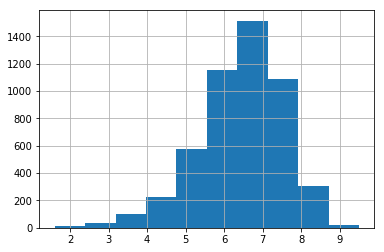

In [7]:
df['imdb_score'].hist()

## Binning DV

<img src="https://cdn-images-1.medium.com/max/1600/1*ASYpFfDh7XnreU-ygqXonw.png" width="60%" style="float: center">

In [8]:
dv = df["imdb_score"]

bins = [-1, 2, 4, 6, 8, 11]
bin_labels = [1, 2, 3, 4, 5]
dv_binned = pd.cut(dv, bins, right = False, labels = bin_labels)
df['imdb_score_binned'] = dv_binned

print(dv_binned.values)

[4, 4, 4, 5, 4, ..., 4, 4, 4, 4, 4]
Length: 5043
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [9]:
df['imdb_score_binned'].groupby(df['imdb_score_binned']).count()/len(df)

imdb_score_binned
1    0.000991
2    0.029942
3    0.257386
4    0.646639
5    0.065041
Name: imdb_score_binned, dtype: float64

# Using Numerical Features

## Specify Numeric Features (IVs)

    numeric_features = all "continuous" features

In [183]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,4
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,4
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,5
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,4


In [4]:
numeric_features = df._get_numeric_data().columns.values.tolist()
numeric_features.remove('title_year')

print('# of Rows: ', df[numeric_features].shape[0])
print('# of Variables: ', df[numeric_features].shape[1])
print('Variables: ', df[numeric_features].columns.values)

df[numeric_features].head()

# of Rows:  5043
# of Variables:  15
Variables:  ['num_critic_for_reviews' 'duration' 'director_facebook_likes'
 'actor_3_facebook_likes' 'actor_1_facebook_likes' 'gross'
 'num_voted_users' 'cast_total_facebook_likes' 'facenumber_in_poster'
 'num_user_for_reviews' 'budget' 'actor_2_facebook_likes' 'imdb_score'
 'aspect_ratio' 'movie_facebook_likes']


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,12.0,7.1,NaN,0


## Feature (IV) Transformations

In [162]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

# impute missing values
imp = SimpleImputer(strategy = "most_frequent")
df[numeric_features] = imp.fit_transform(df[numeric_features])

# use standard scaler to keep as much variance as possible (compared to minmax)
scl = StandardScaler()
df[numeric_features] = scl.fit_transform(df[numeric_features])

print('# of Rows: ', df[numeric_features].shape[0])
print('# of Variables: ', df[numeric_features].shape[1])
print('Variables: ', df[numeric_features].columns.values)

df[numeric_features].head()

# of Rows:  5043
# of Variables:  15
Variables:  ['num_critic_for_reviews' 'duration' 'director_facebook_likes'
 'actor_3_facebook_likes' 'actor_1_facebook_likes' 'gross'
 'num_voted_users' 'cast_total_facebook_likes' 'facenumber_in_poster'
 'num_user_for_reviews' 'budget' 'actor_2_facebook_likes' 'imdb_score'
 'aspect_ratio' 'movie_facebook_likes']


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.797503,2.814318,-0.241367,0.125431,-0.369902,11.160073,5.795674,-0.267871,-0.679747,7.369256,1.016877,-0.176884,1.295873,-0.335116,1.318632
1,1.340129,2.456819,-0.039256,0.212714,2.228319,4.168026,2.798784,2.128121,-0.679747,2.559467,1.338521,0.829814,0.584764,0.090444,-0.389572
2,3.803816,1.622653,-0.241367,-0.292328,0.296309,2.473418,1.388010,0.110172,-0.182725,1.913218,1.057721,-0.311391,0.318099,0.090444,4.010348
3,5.536609,2.258208,7.656405,13.455777,1.362246,6.318278,7.659834,5.344122,-0.679747,6.434314,1.083248,5.288616,1.829204,0.090444,8.099687
4,-1.131770,-0.681231,-0.194340,0.212714,-0.427796,-0.581219,-0.604169,-0.526157,-0.679747,-0.716805,-0.091008,-0.405769,0.584764,0.090444,-0.389572


## Splitting Training and Testing Sets

<img src="https://image.slidesharecdn.com/mlregression-splittingdatasets-170914113926/95/machine-learning-splitting-datasets-3-638.jpg?cb=1505389251" width="60%" style="float: center">

In [163]:
X = df[numeric_features].drop(["imdb_score"], axis = 1)
y = df['imdb_score_binned']

# split training sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forests

    Decision Tree

<img src="https://i.stack.imgur.com/l6r4F.jpg" width="80%" style="float: center">

    Random Forests

<img src="https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png" width="80%" style="float: center">


In [164]:
# choose a classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features = "sqrt")

## Cross Validation

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg" width="60%" style="float: center">

In [184]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[5, 8, 25], "n_estimators":[800, 1200]}
clf = GridSearchCV(RFC, parameters)
clf.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 8, 25], 'n_estimators': [800, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
print(X.columns)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

# for k, v in sorted(clf.cv_results_.items()):
#     print(k, v)

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
0.6888756692444973
{'max_depth': 25, 'n_estimators': 1200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# Adding Categorical Features

In [167]:
df_clean = df[numeric_features]

## Dummy Coding Movie Genres

In [168]:
def pipe_flatten_names(keywords):
    return keywords.split('|')

liste_genres = set()
for s in df['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)

liste_genres = list(liste_genres)
print(liste_genres)

for genre in liste_genres:
    df_clean[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
    
df_clean.head()

['Sci-Fi', 'Comedy', 'Music', 'Adventure', 'Action', 'Horror', 'Short', 'News', 'Animation', 'Biography', 'Fantasy', 'Reality-TV', 'Mystery', 'Film-Noir', 'Family', 'Musical', 'Romance', 'Thriller', 'Drama', 'Western', 'Sport', 'Documentary', 'Crime', 'History', 'Game-Show', 'War']


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Romance,Thriller,Drama,Western,Sport,Documentary,Crime,History,Game-Show,War
0,4.797503,2.814318,-0.241367,0.125431,-0.369902,11.160073,5.795674,-0.267871,-0.679747,7.369256,...,0,0,0,0,0,0,0,0,0,0
1,1.340129,2.456819,-0.039256,0.212714,2.228319,4.168026,2.798784,2.128121,-0.679747,2.559467,...,0,0,0,0,0,0,0,0,0,0
2,3.803816,1.622653,-0.241367,-0.292328,0.296309,2.473418,1.388010,0.110172,-0.182725,1.913218,...,0,1,0,0,0,0,0,0,0,0
3,5.536609,2.258208,7.656405,13.455777,1.362246,6.318278,7.659834,5.344122,-0.679747,6.434314,...,0,1,0,0,0,0,0,0,0,0
4,-1.131770,-0.681231,-0.194340,0.212714,-0.427796,-0.581219,-0.604169,-0.526157,-0.679747,-0.716805,...,0,0,0,0,0,1,0,0,0,0


## Running Random Forests

In [169]:
X = df_clean.drop(["imdb_score"], axis = 1)
y = df['imdb_score_binned']

# split training sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choose a classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features = "sqrt")

from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[5, 8, 25], "n_estimators":[800, 1200]}
clf = GridSearchCV(RFC, parameters)
clf.fit(X, y)

print(X.columns)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes', 'Sci-Fi', 'Comedy', 'Music',
       'Adventure', 'Action', 'Horror', 'Short', 'News', 'Animation',
       'Biography', 'Fantasy', 'Reality-TV', 'Mystery', 'Film-Noir', 'Family',
       'Musical', 'Romance', 'Thriller', 'Drama', 'Western', 'Sport',
       'Documentary', 'Crime', 'History', 'Game-Show', 'War'],
      dtype='object')
0.7170335117985326
{'max_depth': 25, 'n_estimators': 800}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min

In [170]:
# Adding other categorical features
for feature in ['content_rating', 'color']:
    df_clean = pd.concat([df_clean, pd.get_dummies(df[feature], prefix = feature, dummy_na = True)], axis = 1)


In [171]:
X = df_clean.drop(["imdb_score"], axis = 1)
y = df['imdb_score_binned']

# split training sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choose a classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features = "sqrt")

from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[5, 8, 25], "n_estimators":[800, 1200]}
clf = GridSearchCV(RFC, parameters)
clf.fit(X, y)

print(X.columns)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes', 'Sci-Fi', 'Comedy', 'Music',
       'Adventure', 'Action', 'Horror', 'Short', 'News', 'Animation',
       'Biography', 'Fantasy', 'Reality-TV', 'Mystery', 'Film-Noir', 'Family',
       'Musical', 'Romance', 'Thriller', 'Drama', 'Western', 'Sport',
       'Documentary', 'Crime', 'History', 'Game-Show', 'War',
       'content_rating_Approved', 'content_rating_G', 'content_rating_GP',
       'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed',
       'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G',
       'content_rating_TV-MA', 'content_rating_TV-PG

# More Features = Better Performance ?
## Dummy Coding Director/Actor Names

In [151]:
# Adding Director/Actor Names, Country, Languages
for feature in ['director_name']:
    df_clean = pd.concat([df_clean, pd.get_dummies(df[feature], prefix = feature, dummy_na = True)], axis = 1)

# Adding Keywords

# def pipe_flatten_names(keywords):
#     return keywords.split('|')

# liste_keywords = set()
# for s in df['plot_keywords'].str.split('|'):
#     if type(s) == list:
#         liste_keywords = set().union(s, liste_keywords)

# liste_keywords = list(liste_keywords)
# print(liste_keywords[:10])

# for keyword in liste_keywords:
#     df_reduced[keyword] = df['plot_keywords'].str.contains(keyword).apply(lambda x:1 if x else 0)

df_clean.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,director_name_Zack Ward,director_name_Zackary Adler,director_name_Zak Penn,director_name_Zal Batmanglij,director_name_Zoran Lisinac,director_name_Álex de la Iglesia,director_name_Émile Gaudreault,director_name_Éric Tessier,director_name_Étienne Faure,director_name_nan
0,4.797503,2.814318,-0.241367,0.125431,-0.369902,11.160073,5.795674,-0.267871,-0.679747,7.369256,...,0,0,0,0,0,0,0,0,0,0
1,1.340129,2.456819,-0.039256,0.212714,2.228319,4.168026,2.798784,2.128121,-0.679747,2.559467,...,0,0,0,0,0,0,0,0,0,0
2,3.803816,1.622653,-0.241367,-0.292328,0.296309,2.473418,1.388010,0.110172,-0.182725,1.913218,...,0,0,0,0,0,0,0,0,0,0
3,5.536609,2.258208,7.656405,13.455777,1.362246,6.318278,7.659834,5.344122,-0.679747,6.434314,...,0,0,0,0,0,0,0,0,0,0
4,-1.131770,-0.681231,-0.194340,0.212714,-0.427796,-0.581219,-0.604169,-0.526157,-0.679747,-0.716805,...,0,0,0,0,0,0,0,0,0,0


## Running Random Forests

In [152]:
X = df_clean.drop(["imdb_score"], axis = 1)
y = df['imdb_score_binned']

# split training sets and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choose a classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features = "sqrt")

from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[5, 8, 25], "n_estimators":[800, 1200]}
clf = GridSearchCV(RFC, parameters)
clf.fit(X, y)

print(X.columns)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews',
       ...
       'director_name_Zack Ward', 'director_name_Zackary Adler',
       'director_name_Zak Penn', 'director_name_Zal Batmanglij',
       'director_name_Zoran Lisinac', 'director_name_Álex de la Iglesia',
       'director_name_Émile Gaudreault', 'director_name_Éric Tessier',
       'director_name_Étienne Faure', 'director_name_nan'],
      dtype='object', length=2439)
0.6829268292682927
{'max_depth': 25, 'n_estimators': 800}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estima